<a href="https://colab.research.google.com/github/Chaitra-B-V/Multiclass-Classification-Using-Pycaret/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [8]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Chaitra-B-V/Multiclass-Classification-Using-Pycaret/main/students_adaptability_level_online_education.csv'



In [11]:
dataset = pd.read_csv(url)

In [12]:
#check the shape of data
dataset.shape

(1205, 14)

In [13]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1084, 14)
Unseen Data For Predictions: (121, 14)


In [16]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Adaptivity Level', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Adaptivity Level
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Moderate: 2"
4,Original Data,"(1084, 14)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Adaptivity Level',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', '

In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8932,0.9694,0.8381,0.8978,0.8920,0.8088,0.8118,0.508
dt,Decision Tree Classifier,0.8892,0.9504,0.8356,0.8952,0.8889,0.8029,0.8061,0.017
et,Extra Trees Classifier,0.8892,0.9719,0.8358,0.8932,0.8882,0.8023,0.8050,0.460
lightgbm,Light Gradient Boosting Machine,0.8707,0.9523,0.8069,0.8732,0.8684,0.7664,0.7698,0.165
gbc,Gradient Boosting Classifier,0.8087,0.9094,0.7307,0.8116,0.8042,0.6523,0.6567,0.351
knn,K Neighbors Classifier,0.7573,0.8857,0.6995,0.7653,0.7563,0.5722,0.5768,0.117
lr,Logistic Regression,0.6966,0.7920,0.5793,0.7056,0.6855,0.4336,0.4467,0.365
ridge,Ridge Classifier,0.6913,0.0000,0.5758,0.7026,0.6791,0.4220,0.4373,0.014
lda,Linear Discriminant Analysis,0.6754,0.7913,0.5903,0.6881,0.6676,0.4025,0.4154,0.018
ada,Ada Boost Classifier,0.6411,0.6462,0.5241,0.6378,0.6316,0.3382,0.3414,0.111


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [18]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9551,0.8750,0.8960,0.8947,0.8112,0.8122
1,0.8684,0.9788,0.8556,0.8710,0.8689,0.7664,0.7672
2,0.8947,0.9721,0.8306,0.8979,0.8934,0.8083,0.8096
3,0.9079,0.9729,0.7944,0.9125,0.9030,0.8305,0.8334
4,0.8158,0.9515,0.7806,0.8257,0.8183,0.6803,0.6829
5,0.9211,0.9696,0.8556,0.9259,0.9191,0.8580,0.8613
6,0.9211,0.9794,0.8714,0.9260,0.9195,0.8603,0.8635
7,0.9079,0.9685,0.8569,0.9105,0.9068,0.8364,0.8373
8,0.8933,0.9713,0.8222,0.9049,0.8909,0.8053,0.8174


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
#trained model object is stored in the variable 'rf'. 
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
!pip install gradio


In [21]:
create_app(rf)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as      Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University       Government         No       No   
1      Girl  16-20      University       Government         No      Yes   
2       Boy  11-15          School   Non Government         No      Yes   
3       Boy   6-10          School   Non Government         No      Yes   
4       Boy  11-15          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1079   Girl  21-25      University   Non Government        Yes      Yes   
1080   Girl  16-20         College   Non Government         No      Yes   
1081    Boy  16-20         College       Government        Yes      Yes   
1082   Girl  11-15          School   Non Government         No      Yes   
1083    Boy  21-25     

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://12655.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fe39d825f10>,
 'http://127.0.0.1:7860/',
 'https://12655.gradio.app')

In [22]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.8102,0.7444,0.7382,0.7175,0.5103,0.5148
1,0.7368,0.8523,0.7639,0.7586,0.7423,0.5516,0.5552
2,0.7368,0.8130,0.7611,0.7448,0.7382,0.5424,0.5437
3,0.6842,0.8405,0.6889,0.7105,0.6888,0.4698,0.4770
4,0.6974,0.8162,0.7028,0.7791,0.7159,0.5158,0.5376
5,0.7500,0.8793,0.7778,0.7851,0.7582,0.5819,0.5900
6,0.7368,0.8525,0.7390,0.7466,0.7371,0.5524,0.5572
7,0.7105,0.8470,0.7575,0.7530,0.7178,0.5318,0.5437
8,0.8000,0.8778,0.8068,0.8109,0.8028,0.6537,0.6553


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


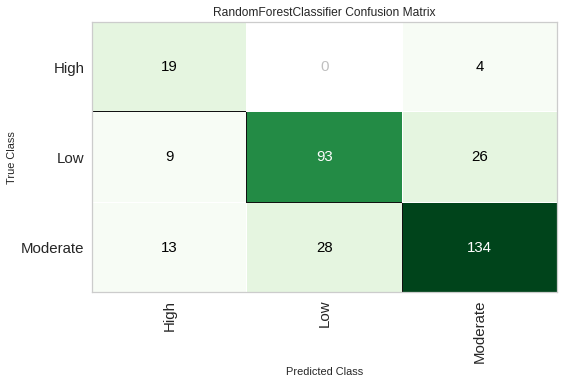

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(tuned_rf, plot = 'confusion_matrix')

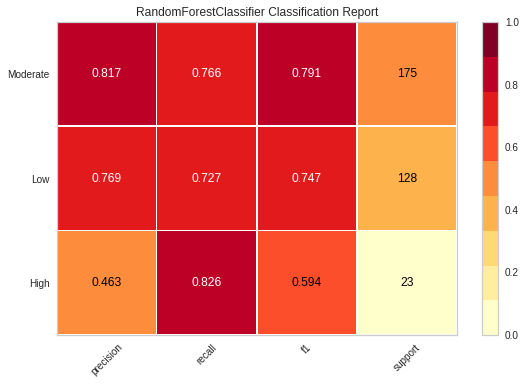

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_rf, plot = 'class_report')

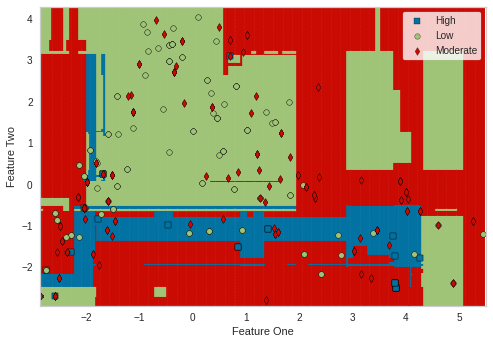

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_rf, plot='boundary')

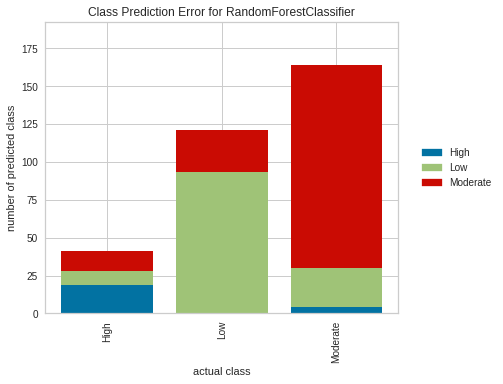

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(tuned_rf, plot = 'error')

In [28]:
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7546,0.861,0.7728,0.7731,0.7596,0.5735,0.5762


In [29]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                  

In [30]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0,0.925,0,0,0,0,0


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Label,Score
0,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,Low,0.4506
1,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,Moderate,0.4014
2,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,0.6371
3,Girl,21-25,University,Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,0.5239
4,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,0.4562


In [31]:
save_model(final_rf,'Multiclass_Classification')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), model_name=Multiclass_Classification, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Adaptivity Level',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
             

In [33]:
saved_final_rf = load_model('Multiclass_Classification')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Multiclass_Classification, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [34]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Adaptivity Level',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                            

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0,0.925,0,0,0,0,0


In [35]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Adaptivity Level',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                            

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0,0.925,0,0,0,0,0


In [36]:
new_prediction.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Label,Score
0,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,Low,0.4506
1,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,Moderate,0.4014
2,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,0.6371
3,Girl,21-25,University,Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,0.5239
4,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,0.4562
